# House Price Prediction: Model 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_log_error


In [2]:
# from google.colab import drive

# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/YData/Kaggle/Housing/train.csv', index_col= 'Id')

# y = df['SalePrice']

In [3]:
df = pd.read_csv('train.csv', index_col= 'Id')
y = df['SalePrice']

In [4]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorch

In [5]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorch

To know how to handle the data, we looked at the data description file provided, and categorized each feature to their respective categories:

In [6]:
obj_nominal      = np.array(['MSSubClass','Street', 'LotConfig','LandContour','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','GarageType','MasVnrType','Foundation','Heating','CentralAir','SaleType','SaleCondition']) 
obj_ordinal      = np.array(['LotShape','Utilities','LandSlope', 'Fence', 'FireplaceQu','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1' ,'BsmtFinType2','HeatingQC','KitchenQual','Functional','GarageFinish','GarageQual','GarageCond','PavedDrive', 'Electrical']) # PoolQC will be converted to boolean. Electrical is ordinal 
# q stands for quantitative
obj_quantitative = np.array(['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']) # Bigger is "better". Not found 'Bedroom','Kitchen'. Weird feature: 'BsmtFinType2'. High nan rate: 'LotFrontage'
# q_date_related   = np.array(['MoSold','YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']) #For Label encoding
num_ordinal = ['OverallQual','OverallCond', 'YrSold','YearBuilt', 'YearRemodAdd','GarageYrBlt',]

Based on what type of data each feature belongs to will determine how that feature should be engineered: Ordinal Encoding, One-Hot encoding, or leaving as quantitative values

### Handling Null Values

In [7]:
df.columns[df.isna().any().tolist()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence'],
      dtype='object')

Looking at the data description,  a lot of these columns have a significant value of Na (usually means that that the house doesn't have the specificied feature), which are not just missing values. The following list explains how the null values will be handled:


**continuous**: MasVnrArea: mean()
Lot Frontage:  mean()
GarageYrBlt: Mode()


**Categorical** : MasVnrType:  mode()
Electrical : Mode()


**Ordinal_encoding** : 'Leave NA's for the ordinal encoding

'BsmtQual','BsmtCond', 'BsmtExposure','GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'FireplaceQu', 'BsmtFinType1', 'BsmtFinType2',

**One_hot**: Leave NA's for the OneHot Encoding

'GarageType'

In [8]:
#Do the following, only if changing MasVnrType and GarageType NA's to 'None':
def fillNa(df):
    df['LotFrontage'].fillna(0, inplace= True) #median
    df['MasVnrType'].fillna('None', inplace= True) 

    df.loc[df['MasVnrType'] == 'None', ['MasVnrArea']].fillna(0, inplace= True ) #Use .loc to get rid of the Setting on Slice warning.
    df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace = True)
    
    df.loc[df['GarageType'] == 'None', ['GarageYrBlt']].fillna(0, inplace= True)
    df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace = True) #Fix this

    # df['Electrical'].fillna(df['Electrical'].mode(), inplace= True)
    df['Electrical'].fillna('Mix', inplace= True) #Maybe switch to mode

    df['MSSubClass'] = df['MSSubClass'].apply(str).fillna('None', inplace= True)
    df["Functional"] = df["Functional"].fillna('Type')
    
    return df

## Feature Engineering/Pre-processing

Preparing the Ordianl Encoding Features: 

In [9]:
def get_ordinal_features(df_tmp, obj_ordinal): #, q_date_related
  df = df_tmp.copy()
  # columns = np.concatenate((obj_ordinal, q_date_related))
  columns = obj_ordinal
  # First encoding type
  enc1_arr = np.array(['ExterQual','ExterCond','PoolQC', 'BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond'])
  dct1 = {np.nan :0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

  # Second encoding type
  enc2_arr = np.array(['LotShape'])
  dct2 = {'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}
  enc3_arr = np.array(['BsmtFinType1', 'BsmtFinType2'])
  dct3 = {np.nan : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}

  df[enc1_arr] = df[enc1_arr].replace(dct1)
  df[enc2_arr] = df[enc2_arr].replace(dct2)
  df[enc3_arr] = df[enc3_arr].replace(dct3)

  df = df.replace({
                      "BsmtExposure" : {np.nan: 0, 'No' : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                      "Fence" : {np.nan :1, 'MnWw':2, 'GdWo':3, 'MnPrv':4, 'GdPrv':5},
                      "Electrical": {'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5},
                      	
                      "FireplaceQu" : {np.nan : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                      "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                      "Min2" : 6, "Min1" : 7, "Typ" : 8},
                      # "GarageType"
                      "GarageFinish" : {np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3 },
                       	
                      "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                      "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                      "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                      "Street" : {"Grvl" : 1, "Pave" : 2},
                      "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}
                    }
                  )
  
  #Date related columns
  # for c in q_date_related: 
  #   lbl = LabelEncoder() 
  #   lbl.fit(list(df[c].values)) 
  #   df[c] = lbl.transform(list(df[c].values))

  return df[columns]

Preparing the Nominal features for One-hot encoding

In [10]:
def get_nominal_features(df, obj_nominal):
  x = df.loc[:, obj_nominal]
  x = x.astype(str) #For some reason, need to convert to string first, otherwise get an unhashable type 'Series' error.

  obj_nominal_oneHot = pd.get_dummies(data=x)
  return obj_nominal_oneHot

In [11]:
import scipy
from scipy.stats import skew

def get_quantitative_features(df, obj_quantitative):
    df.loc[:, obj_quantitative] = df.loc[:, obj_quantitative] +1

    df['try1']= df['YrSold']-df['YearBuilt']
    df['total_bathrooms'] = df.BsmtFullBath + df.BsmtHalfBath/2 + df.FullBath + df.HalfBath /2
    df['total_rooms'] = df.TotRmsAbvGrd + df.total_bathrooms #
    df['has_pool'] = np.where(df.PoolArea >0, 1, 0)
    df['has_basement'] = np.where(df.BsmtFinSF1 > 0 , 1, 0)
    df['has_2flr'] = np.where(df['2ndFlrSF'] > 0 , 1, 0)
    df['has_porch'] = np.where(df.OpenPorchSF >0, 1,0)

    df['total_square_feet'] =  df.TotalBsmtSF + df['1stFlrSF'] +  df['2ndFlrSF']# + PoolArea + df.LotArea +  + df.GarageArea 




    # numeric_feats = df.dtypes[df.dtypes != "object"].index
    # skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    # # print("\nSkew in numerical features: \n")
    # skewness = pd.DataFrame({'Skew' :skewed_feats})
    # print(skewness.head(10))

    # skewness = skewness[abs(skewness) > 0.75]
    # print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

    # from scipy.special import boxcox1p
    # skewed_features = skewness.index
    # lam = 0.15
    # for feat in skewed_features:
    #     #all_data[feat] += 1
    #     df[feat] = boxcox1p(df[feat], lam)


    return df[obj_quantitative]

Now, merge all of our transformed dataframes back together

In [12]:
def process_df(df):
    filled_df = fillNa(df)
    
    df_train_ordinal  = get_ordinal_features(filled_df, obj_ordinal) #, q_date_related
    obj_nominal_oneHot = get_nominal_features(filled_df, obj_nominal)

    obj_quantitative_df = get_quantitative_features(df, obj_quantitative)

    df_merge = df_train_ordinal.join([obj_quantitative_df, obj_nominal_oneHot, df[num_ordinal]]) #, df[q_date_related]

    

    return df_merge

### Feature Pre-processing Pipeline

This combines all of our pre-processing functions together. The input takes both the training set, and the testing set. We then combine them together to make sure that the transforms of the one_hot encoding are uniform, and return back the pre-processed training and testing data frames (as well as the target labels from the training set).

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
def feature_pipeline(df_train, df_test):
    
    train_idx = df_train.index
    test_idx = df_test.index
    
    labels = df_train.loc[:, 'SalePrice']
    # labels = np.log1p(labels)
    df_train = df_train.drop('SalePrice', axis = 1)
    df = pd.concat([df_train, df_test])
    
    df_processed = process_df(df)
    
    df_train = df_processed.loc[train_idx]
    
    df_test = df_processed.loc[test_idx]

    # scaler = StandardScaler()
    # df_train = scaler.fit_transform(df_train.values)
    # df_test = scaler.transform(df_test.values)

    return df_train, df_test, labels


In [15]:
df

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,NaN,MnPrv,0,2,2010,WD,Normal,210000
1458,70,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,NaN,GdPrv,2500,5,2010,WD,Normal,266500


In [16]:
##For working with Collab
# train_df = pd.read_csv('train.csv', index_col = 'Id')
# test_df = pd.read_csv('test.csv', index_col= 'Id')

# train_df = pd.read_csv('/content/drive/MyDrive/YData/Kaggle/Housing/train.csv', index_col= 'Id')
# test_df = pd.read_csv('/content/drive/MyDrive/YData/Kaggle/Housing/test.csv', index_col= 'Id')

# df_train, df_test, labels = feature_pipeline(train_df, test_df)

In [17]:
#For working on local IDE
train_df = pd.read_csv('train.csv', index_col = 'Id')
test_df = pd.read_csv('test.csv', index_col= 'Id')

df_train, df_test, labels = feature_pipeline(train_df, test_df)

Double check that there are no null values in the training set:

In [18]:
# df_train.columns[df_train.isna().any().tolist()]

# Modeling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error

#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(df_train.values, labels, test_size= 0.2, random_state= 1) #.values on df_merge just gets rid of the clunky user warning for using a Dataframe

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error

#### XGBoost

In [22]:
from xgboost.sklearn import XGBRegressor


In [24]:
# paramaters = {'eta' : [0.3, 0.5, 0.8, 1.1, 1.2],
#                 'n_estimators': np.arange(100,300, step = 50), 
#                 'max_depth': [2, 4, 10, 30, 50, 100], 
#                 }
parameters = {'eta' : [0.01],
                'n_estimators': [500,550,600], 
                'max_depth': [3,4], #pretty much always is 3
                'min_child_weight':  [2,3],
                'objective' : ['reg:gamma'],
                'colsample_bytree': [0.5]
                }

XGB_clf = GridSearchCV(XGBRegressor(),  parameters, cv = 4, verbose= 10 , n_jobs = -1)
XGB_clf.fit(x_train, y_train)
print(XGB_clf.best_params_)

XG = XGBRegressor(**XGB_clf.best_params_)
XG.fit(x_train, y_train)
print(f'validation score with best parameters: {XG.score(x_test, y_test)}')
print('mean_squared_log_error', mean_squared_log_error(y_test, XG.predict(x_test), squared= False))

ValueError: 'neg_sqaured_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [156]:
# from xgboost.sklearn import XGBRegressor
# XGB_clf = XGBRegressor(colsample_bytree= 0.5, eta = 0.01, max_depth=3, min_child_weight=2 , n_estimators=550, objective= 'reg:gamma')
# XGB_clf.fit(x_train, y_train)

# # print(f'validation score with best parameters: {XGB_clf.score(x_test, y_test)}')
# print('mean_squared_error', mean_squared_error(y_test,       np.expm1(XGB_clf.predict(x_test))))
# print('mean_squared_log_error', mean_squared_log_error(y_test,    np.expm1(XGB_clf.predict(x_test)), squared= False))

# from sklearn.metrics import r2_score
# y_test_pred = XGB_clf.predict(x_test)
# plt.scatter(y_test, np.expm1(y_test_pred))

# # The coefficients
# # The mean squared error
# print("Mean squared error: %.3f" % mean_squared_error(y_test,np.expm1(y_test_pred)))
# # The coefficient of determination: 1 is perfect prediction
# print("mean_squared_log_error: %.3f" % mean_squared_log_error(y_test, np.expm1(y_test_pred), squared = False))

In [22]:
from xgboost.sklearn import XGBRegressor
XGB_clf = XGBRegressor(colsample_bytree= 0.5, eta = 0.01, max_depth=3, min_child_weight=2 , n_estimators=600, objective= 'reg:gamma')
XGB_clf.fit(x_train, y_train)

# print(f'validation score with best parameters: {XGB_clf.score(x_test, y_test)}')
print('mean_squared_error', mean_squared_error(y_test,       XGB_clf.predict(x_test)))
print('mean_squared_log_error', mean_squared_log_error(y_test,    XGB_clf.predict(x_test), squared= False))

mean_squared_error 511903598.324484
mean_squared_log_error 0.11955383630930072


Mean squared error: 511903598.324
mean_squared_log_error: 0.120


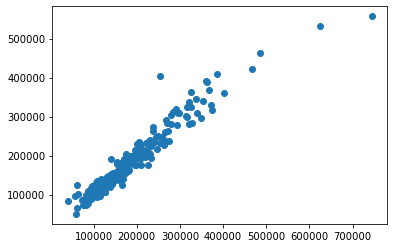

In [36]:
from sklearn.metrics import r2_score
y_test_pred = XGB_clf.predict(x_test)
plt.scatter(y_test, y_test_pred)

# The coefficients
# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_test_pred))
# The coefficient of determination: 1 is perfect prediction
print("mean_squared_log_error: %.3f" % mean_squared_log_error(y_test, y_test_pred, squared = False))

In [23]:
RandomForestRegressor()
rf = RandomForestRegressor(random_state = 1)
rf = GridSearchCV(rf, {'n_estimators': [100, 200, 300, 500], 'max_depth': [3, 4, 5,7, 10] }, n_jobs = -1, cv = 4)
rf.fit(x_train,y_train)
print(rf.best_params_)
rf_best = rf.best_estimator_
# print("mean_squared_log_error: %.3f" % mean_squared_log_error(y_test, rf.predict(x_test), squared = False))



mean_squared_log_error: 0.152


In [28]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
svr = make_pipeline(RobustScaler(), SVR(kernel = 'linear', C = 1000, epsilon = 0.1, gamma = 'scale'))

svr.fit(x_train,y_train)
print("mean_squared_log_error: %.3f" % mean_squared_log_error(y_test, svr.predict(x_test), squared = False))

In [24]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=2000,
                              max_bin = 50, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11, )
# lightgbm = LGBMRegressor(objective='regression', 
#                                        num_leaves=4,
#                                        learning_rate=0.01, 
#                                        n_estimators=5000,
#                                        max_bin=200, 
#                                        bagging_fraction=0.75,
#                                        bagging_freq=5, 
#                                        bagging_seed=7,
#                                        feature_fraction=0.2,
#                                        feature_fraction_seed=7,
#                                        verbose=-1,
#                                        )
model_lgb.fit(x_train, y_train)                              
print("mean_squared_log_error: %.3f" % mean_squared_log_error(y_test, model_lgb.predict(x_test), squared = False))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


KeyboardInterrupt: 

In [28]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

best_svr = svr.best_estimator_
best_rf = rf_best
# best_xgb = XGB_clf.best_estimator_
best_xgb = XGB_clf


voting_clf = StackingRegressor(estimators = [('rf',best_rf),('svr',best_svr)], cv = 4) 
voting_clf_xgb = StackingRegressor(estimators = [('rf',best_rf),('svr',best_svr), ('xgb', best_xgb)], cv = 4 )

# print('voting_clf_hard :',cross_val_score(voting_clf_hard,x_train,y_train,cv=5))
# print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,x_train,y_train,cv=5).mean())
voting_clf.fit(x_train, y_train)
print('score on validation set: ', mean_squared_log_error(y_test, voting_clf.predict(y_test)))

# print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,x_train,y_train,cv=5))
# print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,x_train,y_train,cv=5).mean())
voting_clf_xgb.fit(x_train, y_train)
print('score on validation set: ', mean_squared_log_error(y_test, voting_clf_xgb.predict(y_test)))

ValueError: Expected 2D array, got 1D array instead:
array=[231500. 179500. 122000.  84500. 142000. 325624. 285000. 151000. 195000.
 275000. 175000.  61000. 174000. 385000. 230000.  87000. 125000.  98600.
 260000. 143000. 124000. 122500. 236500. 337500.  76000. 187000. 128000.
 179000. 485000. 122500. 106000. 118000. 127000.  80000. 153000. 360000.
 132000.  85500. 262280. 112000. 131000. 139000.  87000. 135000. 181000.
 163500. 116900. 159895. 244600. 294000.  97000. 295000. 120500. 239500.
 194000. 115000. 119500. 180000. 118000. 178000. 167000. 267000.  82000.
 133900. 167000. 132500. 135000. 248000. 160000. 144500. 200500. 113000.
 354000. 164000. 170000. 224000. 163900. 160000. 466500. 172500. 193500.
 133000. 137000. 167500. 196500. 146000. 159500. 158000. 189000. 172500.
 194201. 181000. 115000. 101800. 100000. 139000. 115000. 139000. 156000.
 158000. 172000. 138000. 125500. 123000. 134500. 163000. 169990. 140000.
 140000. 325000. 157500. 225000. 107000. 185500. 239900. 163990. 201000.
 127000. 172500. 228000. 117000. 232600. 403000. 169500. 151400. 180000.
 370878.  55993. 207500. 224500. 280000.  82000. 137000. 130500.  73000.
 217000. 625000. 367294. 230000. 142000. 115000. 272000. 176500. 234000.
  40000. 213500. 126000. 187100. 200000. 117500. 176000. 174000.  97000.
 169000. 154000. 361919.  85000. 134000.  96500. 127000.  60000. 108480.
 151000. 135000.  99500. 124000. 177500. 144000. 119000. 107500. 254900.
 180500. 222000. 271000. 181000. 140000. 158000. 204750. 135000. 161500.
 128500. 179540. 143000. 147000. 280000. 131500. 253293. 317000. 210000.
 120000. 110000. 127000. 106000. 172500. 166000. 258000. 213000. 150000.
 158500.  82500. 212000. 238000. 158000. 178000. 328900. 110000. 185000.
 320000. 315000. 228950. 180000. 117000. 176000. 111250. 297000. 266000.
 130000.  93500. 186700.  91000. 745000.  62383. 172500. 170000. 119000.
 129900. 210000. 173000. 164500. 170000. 125500. 183000. 103000. 141500.
 315500. 118858. 290000. 119000. 104900. 348000. 374000. 200100. 132250.
 161500. 131500. 104000. 132500. 133000. 170000. 180000. 130000. 125000.
 186500. 171500. 100000. 114500. 173000.  86000. 320000. 133000. 220000.
 137900. 224900. 153500. 115000. 207500. 113000. 178400. 140000.  83000.
 197000. 187500.  81000.  93500. 197500.  93000. 106000. 144000. 220000.
 144900. 139000. 132000. 149000. 153500. 263435. 205000. 132500. 103200.
 249700.  64500.  83000. 339750.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Submission

In [33]:
# test_df = pd.read_csv('/content/drive/MyDrive/YData/Kaggle/Housing/test.csv')
# y_test_sub = XGB_clf.predict(df_test.values)
# df_for_submission = test_df[['Id']]
# df_for_submission['Predicted'] = y_test_sub
# df_for_submission.set_index('Id').Predicted.to_csv('/content/drive/MyDrive/YData/Kaggle/Housing/tal_result_example4.csv')

In [113]:
test_df = pd.read_csv('test.csv')
y_test_sub = XGB_clf.predict(df_test.values)
df_for_submission = test_df.loc[:, ['Id']]
df_for_submission['Predicted'] = y_test_sub
df_for_submission.set_index('Id').Predicted.to_csv('XGBoost_submission.csv')

In [35]:
df_for_submission

,Id,Predicted
0,1461,119497.593750
1,1462,158522.812500
2,1463,187470.093750
3,1464,187621.046875
4,1465,184906.828125
...,...,...
1454,2915,78288.507812
1455,2916,73491.820312
1456,2917,169165.921875
1457,2918,118295.453125
